In [1]:
import numpy as np
import pandas as pd
import os
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import re

### write to csv function


In [2]:
def results_to_csv(df, name):
    df.to_csv(name + '.csv')

## Step 1.) Data Importing and Preprocessing

In [3]:
from os.path import dirname

In [4]:
curr_path = dirname(os.getcwd())
table_path = curr_path + '/original_data'

In [5]:
file_list = os.listdir(table_path)
file_list = [table_path + '/' + i for i in file_list]
file_list

['/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/.DS_Store',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/BigFive.csv',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/class.csv',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/deadlines.csv',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/FlourishingScale.csv',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/grades.csv',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/Kaggle_survey_responses.xlsx',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/LonelinessScale.csv',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/panas.csv',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/PerceivedStressScale.csv',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/PHQ-9.csv',
 '/Users/mark/Desktop/GitHub/Modeling-Student-Stress/original_data/pi

In [8]:
deadlines_df = pd.read_csv(table_path + '/deadlines.csv')
lonely_df = pd.read_csv(table_path + '/LonelinessScale.csv')
perceived_stress_df = pd.read_csv(table_path + '/PerceivedStressScale.csv')
phq_9_df = pd.read_csv(table_path + '/PHQ-9.csv')
vr_12_df = pd.read_csv(table_path + '/vr_12.csv')
psqi_df = pd.read_csv(table_path + '/psqi.csv')
flourishing_scale_df = pd.read_csv(table_path + '/FlourishingScale.csv')
grades_df = pd.read_csv(table_path + '/grades.csv')
panas_df = pd.read_csv(table_path + '/panas.csv')
piazza_df = pd.read_csv(table_path + '/piazza.csv')
big_five = pd.read_csv(table_path + '/BigFive.csv')

### Big Five Dataset
- states responses to variety of questions regarding personality

In [9]:
# set uid to be index
big_five = big_five.set_index("uid")

#replace values with numerical scale
"""
Disagree Strongly - 1
Disagree a little - 2
Neither agree nor disagree - 3
Agree a little - 4
Agree strongly - 5
"""
big_five = big_five.replace("Disagree Strongly", 1)
big_five = big_five.replace("Disagree a little", 2)
big_five = big_five.replace("Neither agree nor disagree", 3)
big_five = big_five.replace("Agree a little", 4)
big_five = big_five.replace("Agree strongly", 5)

#replace nan values with an average of student's responses - most likely same to similar personality trait
c = 0
arr = []
for c in np.arange(0,big_five.shape[0]):
    r = big_five.iloc[c,2:]
    sums = 0
    vals_count = 0
    for val in r:
        if val is not None:
            sums = sums + val
            vals_count = vals_count + 1
    avg = sums / vals_count
    arr = np.append(arr, avg)
    c = c + 1

In [10]:
big_five.isna().describe()

,type,I see myself as someone who... - 1. Is talkative,I see myself as someone who... - 2. Tends to find fault with others,I see myself as someone who... - 3. Does a thorough job,"I see myself as someone who... - 4. Is depressed, blue","I see myself as someone who... - 5. Is original, comes up with new ideas",I see myself as someone who... - 6. Is reserved,I see myself as someone who... - 7. Is helpful and unselfish with others,I see myself as someone who... - 8. Can be somewhat careless,"I see myself as someone who... - 9. Is relaxed, handles stress well.",...,I see myself as someone who... - 35. Prefers work that is routine,"I see myself as someone who... - 36. Is outgoing, sociable",I see myself as someone who... - 37. Is sometimes rude to others,I see myself as someone who... - 38. Makes plans and follows through with them,I see myself as someone who... - 39. Gets nervous easily,"I see myself as someone who... - 40. Likes to reflect, play with ideas",I see myself as someone who... - 41. Has few artistic interests,I see myself as someone who... - 42. Likes to cooperate with others,I see myself as someone who... - 43. Is easily distracted,"I see myself as someone who... - 44. Is sophisticated in art, music, or literature"
count,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
unique,1,1,1,1,1,1,1,1,2,1,...,1,1,1,2,2,2,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,85,85,85,85,85,85,85,85,83,85,...,85,85,85,84,84,84,85,85,85,85


Replacing all null values with a 3 meaning that they neither agree nor disagree. When we start compiling data we can evaluate whether or not the data would be better filled with the median mood of each person

In [11]:
big_five.fillna(3, inplace = True)

In [12]:
#results_to_csv(big_five, 'big_five_CLEAN')

In [13]:
for i in big_five.columns:
    if i == 'type':
        continue
    big_five[i] = big_five[i].astype('int')

In [14]:
big_five.shape

(85, 45)

In [15]:
big_five.head()

,type,I see myself as someone who... - 1. Is talkative,I see myself as someone who... - 2. Tends to find fault with others,I see myself as someone who... - 3. Does a thorough job,"I see myself as someone who... - 4. Is depressed, blue","I see myself as someone who... - 5. Is original, comes up with new ideas",I see myself as someone who... - 6. Is reserved,I see myself as someone who... - 7. Is helpful and unselfish with others,I see myself as someone who... - 8. Can be somewhat careless,"I see myself as someone who... - 9. Is relaxed, handles stress well.",...,I see myself as someone who... - 35. Prefers work that is routine,"I see myself as someone who... - 36. Is outgoing, sociable",I see myself as someone who... - 37. Is sometimes rude to others,I see myself as someone who... - 38. Makes plans and follows through with them,I see myself as someone who... - 39. Gets nervous easily,"I see myself as someone who... - 40. Likes to reflect, play with ideas",I see myself as someone who... - 41. Has few artistic interests,I see myself as someone who... - 42. Likes to cooperate with others,I see myself as someone who... - 43. Is easily distracted,"I see myself as someone who... - 44. Is sophisticated in art, music, or literature"
uid,,,,,,,,,,,,,,,,,,,,,
u00,pre,4,3,3,3,5,4,3,4,3,...,1,5,5,3,2,4,2,4,4,4
u01,pre,3,4,5,5,4,4,5,2,4,...,2,3,2,4,2,5,2,3,2,4
u02,pre,2,4,5,1,3,5,4,2,3,...,5,2,2,4,4,5,4,4,4,3
u03,pre,2,3,4,3,3,4,4,2,3,...,4,2,2,3,4,3,3,2,2,2
u04,pre,2,3,3,2,2,4,5,4,1,...,5,2,4,4,4,3,2,4,4,3


after conducting some research on the significance of the BIG 5 personality test. I found that it is used to score an individual's personality on 5 basic criteria:
    1. Extroversion
    2. Agreeableness
    3. Openness
    4. Conscientiousness
    5. Neuroticism

Essentially an individuals answers to each question in the BIG 5 survey contributes to a score in a specific category. I surfed the interwebs looking for some code to automatically provide scores in each category based on survey responses to no avail, so ill write a function that will do this.

In [16]:
##takes in df of survey answers and return df of scores for each personality trait
cat_key = (['E', 'A', 'C', 'N', 'O'] * 8) + ['O', 'A', 'C', 'O']
sign_key = [1] * 44
neg_ind = [1, 5, 7, 8, 11, 17, 20, 22, 23, 26, 30, 33, 34, 36, 40, 42]

for i in range(44):
    
    if i in neg_ind:
        sign_key[i] = sign_key[i] * -1
    
    
def big_five_scorer(ans_df):
    cat_df = pd.DataFrame(data = np.zeros(shape = (85,5)), 
                          columns = ['E','A', 'C', 'N', 'O'])
    for i in range(44):
        cat = cat_key[i]
        
        if sign_key[i] == 1:
            score_col = np.asarray(ans_df.iloc[:,i])
        else:
            score_col = 6 - np.asarray(ans_df.iloc[:,i])
            
        cat_df[cat] += score_col
        
    return cat_df
    

In [17]:
big_five_scores = big_five_scorer(big_five.iloc[:, 1:]).set_index(big_five.index)
big_five_scores['type'] = big_five['type']
big_five_scores.head()

,E,A,C,N,O,type
uid,,,,,,
u00,30.0,26.0,27.0,25.0,45.0,pre
u01,25.0,34.0,40.0,22.0,39.0,pre
u02,17.0,27.0,38.0,28.0,32.0,pre
u03,17.0,29.0,35.0,27.0,27.0,pre
u04,19.0,28.0,24.0,33.0,29.0,pre


In [18]:
columns = ['type', 'E', 'A', 'C', 'N', 'O']
big_five_scores = big_five_scores[columns]
big_five_scores.head()

,type,E,A,C,N,O
uid,,,,,,
u00,pre,30.0,26.0,27.0,25.0,45.0
u01,pre,25.0,34.0,40.0,22.0,39.0
u02,pre,17.0,27.0,38.0,28.0,32.0
u03,pre,17.0,29.0,35.0,27.0,27.0
u04,pre,19.0,28.0,24.0,33.0,29.0


In [19]:
big_five_scores.mean()

E    23.823529
A    32.694118
C    30.905882
N    23.788235
O    35.764706
dtype: float64

scores in each category should be scaled by the number of questions pertaining to that category in the survey

In [20]:
for i in ['E', 'A', 'C', 'N','O']:
    big_five_scores[i] = big_five_scores[i] / (np.sum([j == i for j in cat_key]))

In [21]:
big_five_scores.mean()

E    2.977941
A    3.632680
C    3.433987
N    2.973529
O    3.576471
dtype: float64

In [22]:
#results_to_csv(big_five_scores, 'big_five_scores_CLEAN')

## Student Deadlines Data

gives number of deadlines per day by student

In [23]:
deadlines_df.shape

(44, 147)

**checking for null values**

In [24]:
deadlines_df.isna().describe()

,uid,2013-03-27,2013-03-28,2013-03-29,2013-03-30,2013-03-31,2013-04-01,2013-04-02,2013-04-03,2013-04-04,...,2013-08-10,2013-08-11,2013-08-12,2013-08-13,2013-08-14,2013-08-15,2013-08-16,2013-08-17,2013-08-18,2013-08-19
count,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
freq,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


**removing columns with all null values**

In [25]:
deadlines_df = deadlines_df.iloc[:,:72]

In [26]:
deadlines_df.isna().describe().loc['freq',:].value_counts()

44    72
Name: freq, dtype: int64

In [27]:
deadlines_df.head()

,uid,2013-03-27,2013-03-28,2013-03-29,2013-03-30,2013-03-31,2013-04-01,2013-04-02,2013-04-03,2013-04-04,...,2013-05-27,2013-05-28,2013-05-29,2013-05-30,2013-05-31,2013-06-01,2013-06-02,2013-06-03,2013-06-04,2013-06-05
0,u01,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,u02,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
2,u03,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,u04,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,u05,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0


**writing to csv file**

In [28]:
#results_to_csv(deadlines_df, 'deadlines_CLEAN')

## Loneliness Data

Gives answers to survey regarding feelings of loneliness

In [29]:
lonely_df.shape

(83, 22)

**Observing columns**

In [30]:
lonely_df.isna().describe().loc['freq',:]

uid                                                            83
type                                                           83
1. I feel in tune with the people around me                    83
2. I lack companionship                                        83
3. There is no one I can turn to                               83
4. I do not feel alone                                         83
5. I feel part of a group of friends                           83
6. I have a lot in common with the people around me            83
7. I am no longer close to anyone                              83
8. My interests and ideas are not shared by those around me    83
9. I am an outgoing person                                     83
10. There are people I feel close to                           83
11. I feel left out                                            83
12. My social relationships are superficial                    83
13. No one really knows me well                                83
14. I feel

In [31]:
lonely_df.head()

,uid,type,1. I feel in tune with the people around me,2. I lack companionship,3. There is no one I can turn to,4. I do not feel alone,5. I feel part of a group of friends,6. I have a lot in common with the people around me,7. I am no longer close to anyone,8. My interests and ideas are not shared by those around me,...,11. I feel left out,12. My social relationships are superficial,13. No one really knows me well,14. I feel isolated from others,15. I can find companionship when I want it,16. There are people who really understand me,17. I am unhappy being so withdrawn,18. People are around me but not with me,19. There are people I can talk to,20. There are people I can turn to
0,u00,pre,Sometimes,Rarely,Never,Never,Often,Sometimes,Never,Never,...,Rarely,Rarely,Never,Never,Often,Rarely,Often,Sometimes,Often,Often
1,u01,pre,Sometimes,Rarely,Rarely,Sometimes,Often,Often,Never,Never,...,Rarely,Rarely,Never,Rarely,Often,Often,Sometimes,Never,Often,Often
2,u02,pre,Sometimes,Rarely,Rarely,Often,Often,Often,Never,Often,...,Rarely,Never,Never,Never,Often,Often,Never,Never,Often,Often
3,u03,pre,Sometimes,Rarely,Never,Often,Rarely,Rarely,Sometimes,Sometimes,...,Rarely,Rarely,Sometimes,Sometimes,Sometimes,Often,Sometimes,Sometimes,Sometimes,Sometimes
4,u04,pre,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Sometimes,Never,Rarely,...,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Sometimes,Sometimes,Rarely,Rarely


**Finding what possible answers used in survey questions**

In [32]:
lonely_df.iloc[:,6].value_counts()

Often        45
Sometimes    22
Rarely       12
Never         4
Name: 5. I feel part of a group of friends, dtype: int64

**Mapping survey answers to integers**
- Higher values correspond to answers indicative of higher levels of depression

In [33]:
lonely_key_neg = {'Never':0, 'Rarely': 1, 'Sometimes':2, 'Often':3}
lonely_key_pos = {'Never':3, 'Rarely': 2, 'Sometimes':1, 'Often':0}

In [34]:
lonely_df.columns

Index(['uid', 'type', '1. I feel in tune with the people around me',
       '2. I lack companionship', '3. There is no one I can turn to',
       '4. I do not feel alone', '5. I feel part of a group of friends',
       '6. I have a lot in common with the people around me',
       '7. I am no longer close to anyone',
       '8. My interests and ideas are not shared by those around me',
       '9. I am an outgoing person', '10. There are people I feel close to',
       '11. I feel left out', '12. My social relationships are superficial',
       '13. No one really knows me well', '14. I feel isolated from others',
       '15. I can find companionship when I want it',
       '16. There are people who really understand me',
       '17. I am unhappy being so withdrawn',
       '18. People are around me but not with me',
       '19. There are people I can talk to',
       '20. There are people I can turn to'],
      dtype='object')

In [35]:
lonely_pos_inds = np.asarray([2,5,6,7,10,11,16,17,20,21])
#lonely_neg_inds = [3,4,8,9,12,13,14,15,18,19]

In [36]:
for i in np.arange(2, len(lonely_df.columns)):
    
    column = lonely_df.iloc[:,i]
    
    if i in lonely_pos_inds:
        lonely_df.iloc[:,i] = column.replace(lonely_key_pos)
    else:
        lonely_df.iloc[:,i] = column.replace(lonely_key_neg)

**Adding total score column to dataset**
- this score is used to evaluate ones risk for depression

In [37]:
lonely_df['Total Score'] = np.sum([lonely_df.iloc[:,i] for i in np.arange(2,len(lonely_df.columns))], axis = 0)

(array([13.,  8., 11., 14., 11.,  6.,  8.,  6.,  1.,  5.]),
 array([ 2. ,  6.3, 10.6, 14.9, 19.2, 23.5, 27.8, 32.1, 36.4, 40.7, 45. ]),
 <a list of 10 Patch objects>)

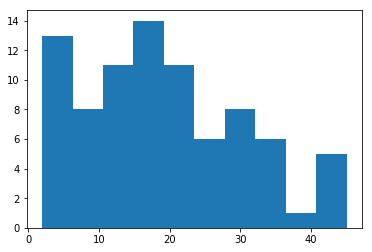

In [38]:
plt.hist(lonely_df['Total Score'])

**checking for null values**

In [39]:
lonely_null = lonely_df.isna().describe()
lonely_null

,uid,type,1. I feel in tune with the people around me,2. I lack companionship,3. There is no one I can turn to,4. I do not feel alone,5. I feel part of a group of friends,6. I have a lot in common with the people around me,7. I am no longer close to anyone,8. My interests and ideas are not shared by those around me,...,12. My social relationships are superficial,13. No one really knows me well,14. I feel isolated from others,15. I can find companionship when I want it,16. There are people who really understand me,17. I am unhappy being so withdrawn,18. People are around me but not with me,19. There are people I can talk to,20. There are people I can turn to,Total Score
count,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83


In [40]:
np.sum(lonely_null.loc['top',:])

0

In [41]:
lonely_null.loc['freq'].value_counts()

83    23
Name: freq, dtype: int64

**writing to csv file**

In [42]:
#results_to_csv(lonely_df, 'loneliness_scale_CLEAN')

## Stress Data

Gives student answers to survey regarding stress

In [43]:
perceived_stress_df.head()

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,u00,pre,Sometime,Sometime,Fairly often,Fairly often,Sometime,Very often,Sometime,Sometime,Fairly often,Fairly often
1,u01,pre,Sometime,Sometime,Sometime,Sometime,Fairly often,Sometime,Fairly often,Fairly often,Almost never,Almost never
2,u02,pre,Fairly often,Sometime,Sometime,Fairly often,Almost never,Sometime,Almost never,Sometime,Sometime,Almost never
3,u03,pre,Sometime,Almost never,Sometime,Almost never,Sometime,Never,Almost never,Never,Never,Never
4,u04,pre,Almost never,Almost never,Fairly often,Sometime,Sometime,Fairly often,Sometime,Almost never,Sometime,Sometime


**Observing categories of answers for survey**

In [44]:
perceived_stress_df.iloc[:,5].value_counts()

Fairly often    36
Sometime        26
Almost never    14
Very often       8
Never            1
Name: 4. In the last month, how often have you felt confident about your ability to handle your personal problems?, dtype: int64

**Mapping answers to numerical values**

In [45]:
positive_inds = [5,6,8,9]

In [46]:
stress_key_neg = {'Never':0, 'Almost never': 1, 'Sometime':2, 'Fairly often': 3, 'Very often':4}
stress_key_pos = {'Never':4, 'Almost never': 3, 'Sometime':2, 'Fairly often': 1, 'Very often':0}

In [47]:
for i in np.arange(2,12):
    if i in positive_inds:
        perceived_stress_df.iloc[:,i].replace(stress_key_pos, inplace = True)
    else:
        perceived_stress_df.iloc[:,i].replace(stress_key_neg, inplace = True)

In [48]:
perceived_stress_df.head()

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,u00,pre,2,2,3.0,1,2.0,4,2,2,3,3
1,u01,pre,2,2,2.0,2,1.0,2,1,1,1,1
2,u02,pre,3,2,2.0,1,3.0,2,3,2,2,1
3,u03,pre,2,1,2.0,3,2.0,0,3,4,0,0
4,u04,pre,1,1,3.0,2,2.0,3,2,3,2,2


**checking for null values**

In [49]:
perceived_stress_df.isna().describe()

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
count,85,85,85,85,85,85,85,85,85,85,85,85
unique,1,1,1,1,2,1,2,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,85,85,85,85,84,85,84,85,85,85,85,85


**Replacing null values with the median of the respective column values**

In [50]:
perceived_stress_df = perceived_stress_df.fillna(perceived_stress_df.median())

In [51]:
perceived_stress_df.head()

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,u00,pre,2,2,3.0,1,2.0,4,2,2,3,3
1,u01,pre,2,2,2.0,2,1.0,2,1,1,1,1
2,u02,pre,3,2,2.0,1,3.0,2,3,2,2,1
3,u03,pre,2,1,2.0,3,2.0,0,3,4,0,0
4,u04,pre,1,1,3.0,2,2.0,3,2,3,2,2


**Converting column 4 and 6 types to floats**

In [52]:
perceived_stress_df.iloc[:,4] = perceived_stress_df.iloc[:,4].astype('int', inplace = True)
perceived_stress_df.iloc[:,6] = perceived_stress_df.iloc[:,6].astype('int', inplace = True)

In [53]:
perceived_stress_df.head()

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,u00,pre,2,2,3,1,2,4,2,2,3,3
1,u01,pre,2,2,2,2,1,2,1,1,1,1
2,u02,pre,3,2,2,1,3,2,3,2,2,1
3,u03,pre,2,1,2,3,2,0,3,4,0,0
4,u04,pre,1,1,3,2,2,3,2,3,2,2


**writing to csv file**

In [54]:
#results_to_csv(perceived_stress_df, 'perceived_stress_CLEAN')

## Depression Survey Data

gives answers to official phq 9 survey used clinically to diagnose depression

In [55]:
phq_9_df.shape

(84, 12)

In [56]:
phq_9_df.head()

,uid,type,Little interest or pleasure in doing things,"Feeling down, depressed, hopeless.","Trouble falling or staying asleep, or sleeping too much.",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself",Response
0,u00,pre,Not at all,Several days,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all
1,u01,pre,Several days,Several days,Several days,Several days,Not at all,Several days,Not at all,Not at all,Not at all,Very difficult
2,u02,pre,More than half the days,Several days,More than half the days,More than half the days,More than half the days,Several days,Several days,More than half the days,Not at all,Somewhat difficult
3,u03,pre,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Several days,Not at all,Somewhat difficult
4,u04,pre,Several days,Several days,Not at all,Several days,Several days,Several days,Several days,Not at all,Not at all,Somewhat difficult


**Observing categorical responses to survey**

In [57]:
phq_9_df.iloc[:, 4].value_counts()

Not at all                 41
Several days               25
More than half the days    10
Nearly every day            8
Name: Trouble falling or staying asleep, or sleeping too much., dtype: int64

**Mapping possible responses to numeric values**

In [58]:
phq_keys = {'Not at all':0, 'Several days': 1, 'More than half the days': 2, 'Nearly every day': 3}

In [59]:
phq_res_keys =  {'Not difficult at all': 0, 'Somewhat difficult': 1, 'Very difficult': 2, 'Extremely difficult': 3}

In [60]:
phq_9_df.loc[:,'Response'].value_counts()

Somewhat difficult      37
Not difficult at all    36
Very difficult           3
Extremely difficult      3
Name: Response, dtype: int64

**checking for null values**

In [61]:
phq_9_df.isna().describe()

,uid,type,Little interest or pleasure in doing things,"Feeling down, depressed, hopeless.","Trouble falling or staying asleep, or sleeping too much.",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself",Response
count,84,84,84,84,84,84,84,84,84,84,84,84
unique,1,1,1,1,1,1,1,1,1,1,1,2
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,84,84,84,84,84,84,84,84,84,84,84,79


**Using key to replace categorical values with numeric**

In [62]:
phq_9_df.replace(phq_keys, inplace = True)
phq_9_df.replace(phq_res_keys, inplace = True)

**Replacing null values with column medians**

In [63]:
phq_9_df.fillna(phq_9_df.median(), inplace = True)

In [64]:
phq_9_df.head()

,uid,type,Little interest or pleasure in doing things,"Feeling down, depressed, hopeless.","Trouble falling or staying asleep, or sleeping too much.",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself",Response
0,u00,pre,0,1,0,1,0,0,0,0,0,0.0
1,u01,pre,1,1,1,1,0,1,0,0,0,2.0
2,u02,pre,2,1,2,2,2,1,1,2,0,1.0
3,u03,pre,0,1,0,0,0,0,0,1,0,1.0
4,u04,pre,1,1,0,1,1,1,1,0,0,1.0


**Notes:**
- adding feature of total score for depression survey
- scores of over 14 warrant treatment

In [65]:
phq_9_df['Total_score'] = np.sum([phq_9_df.iloc[:,i] for i in np.arange(2,11)], axis = 0)

In [66]:
phq_9_df.head()

,uid,type,Little interest or pleasure in doing things,"Feeling down, depressed, hopeless.","Trouble falling or staying asleep, or sleeping too much.",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself",Response,Total_score
0,u00,pre,0,1,0,1,0,0,0,0,0,0.0,2
1,u01,pre,1,1,1,1,0,1,0,0,0,2.0,5
2,u02,pre,2,1,2,2,2,1,1,2,0,1.0,13
3,u03,pre,0,1,0,0,0,0,0,1,0,1.0,2
4,u04,pre,1,1,0,1,1,1,1,0,0,1.0,6


In [67]:
sadbois = phq_9_df[phq_9_df['Total_score'] > 14]

In [68]:
sadbois

,uid,type,Little interest or pleasure in doing things,"Feeling down, depressed, hopeless.","Trouble falling or staying asleep, or sleeping too much.",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself",Response,Total_score
16,u18,pre,2,2,1,2,2,3,1,0,2,2.0,15
26,u33,pre,3,3,3,3,3,3,3,2,0,3.0,23
58,u17,post,2,2,3,3,2,3,3,0,0,1.0,18
62,u23,post,2,3,3,2,2,3,2,2,2,2.0,21
68,u33,post,3,3,3,3,3,3,3,3,1,3.0,25
79,u52,post,1,3,3,2,3,1,0,1,1,3.0,15


**writing to csv file**

In [69]:
#results_to_csv(phq_9_df, 'phq_9_CLEAN')

## Physical Activity Data

Student answers to survey regarding quality/quantity/frequency of physical activity

In [70]:
vr_12_df.shape

(83, 16)

**Observing possible categorical values**

In [71]:
vr_12_df.iloc[:, 10].value_counts()

Some of the time          27
A good bit of the time    25
Most of the time          20
A little of the time       8
All of the time            2
None of the time           1
Name: How much of the time during the past 4 weeks: Have you felt calm and peaceful?, dtype: int64

**checking for null values**

In [72]:
vr_12_df.isna().describe()

,uid,type,"In general, would you say your health is","Moderate activities, such as moving a table, pushing a vacuum cleaner, bowling or playing golf?",Climbing several flights of stairs?,Accomplished less than you would like.,Were limited in the kind of work or other activities.,Accomplished less than you would like..1,Didn't do work or other activities as carefully as usual.,"During the past 4 weeks, how much did pain interfere with your normal work (including both work outside the home and housework)?",How much of the time during the past 4 weeks: Have you felt calm and peaceful?,How much of the time during the past 4 weeks: Did you have a lot of energy?,How much of the time during the past 4 weeks: Have you felt downhearted and blue?,"During the past 4 weeks, how much of the time has your physical health or emotional problems interfered with your social activities (like visiting with friends, relatives, etc.)?","Compared to one year ago, how would you rate your physical health in general now?","Compared to one year ago, how would you rate your emotional problems (such as feeling anxious, depressed or irritable) now?"
count,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
unique,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,83,83,83,83,83,83,83,83,83,82,83,83,83,83,83,83


In [73]:
vr_12_df.head()

,uid,type,"In general, would you say your health is","Moderate activities, such as moving a table, pushing a vacuum cleaner, bowling or playing golf?",Climbing several flights of stairs?,Accomplished less than you would like.,Were limited in the kind of work or other activities.,Accomplished less than you would like..1,Didn't do work or other activities as carefully as usual.,"During the past 4 weeks, how much did pain interfere with your normal work (including both work outside the home and housework)?",How much of the time during the past 4 weeks: Have you felt calm and peaceful?,How much of the time during the past 4 weeks: Did you have a lot of energy?,How much of the time during the past 4 weeks: Have you felt downhearted and blue?,"During the past 4 weeks, how much of the time has your physical health or emotional problems interfered with your social activities (like visiting with friends, relatives, etc.)?","Compared to one year ago, how would you rate your physical health in general now?","Compared to one year ago, how would you rate your emotional problems (such as feeling anxious, depressed or irritable) now?"
0,u00,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, some of the time","Yes, some of the time",Not at all,A good bit of the time,Some of the time,Some of the time,Some of the time,Slightly worse,About the same
1,u01,pre,Excellent,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, some of the time","Yes, some of the time",Not at all,A good bit of the time,A good bit of the time,Some of the time,A little of the time,About the same,Much better
2,u02,pre,Good,"No, not limited at all","No, not limited at all","Yes, some of the time","No, none of the time","No, none of the time","Yes, a little of the time",Not at all,Most of the time,Some of the time,A little of the time,None of the time,About the same,Slightly better
3,u03,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, a little of the time","Yes, a little of the time",Not at all,A good bit of the time,A good bit of the time,Some of the time,A little of the time,Slightly better,Slightly worse
4,u04,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, a little of the time","Yes, a little of the time",Not at all,A good bit of the time,A good bit of the time,A little of the time,None of the time,Slightly better,About the same


**Constructing key-value pairings based on category of response**
- had to made 6 different keys for this set
- key1: col 2
- key2: col 3, 4
- key3: col 5, 6, 7
- key4: col 8
- key5: col 9, 10, 11, 12
- key6: col 13, 14

In [74]:
vr_12_key1 = {'Fair': 0, 'Good': 1, 'Very good': 2, 'Excellent': 3}
vr_12_key2 = {'Yes, limited a lot':0 , 'Yes, limited a little': 1, 'No, not limited at all': 3}
vr_12_key3 = {'Yes, all of the time':0, 'Yes, most of the time': 1, 'Yes, some of the time': 2,
              'Yes, a little of the time':3, 'No, none of the time':4 }
vr_12_key4 = {'Extremely': 0, 'Quite a bit': 1, 'Moderately': 2, 'A little bit': 3, 'Not at all':4}
vr_12_key5 = {'None of the time':0 , 'A little of the time':1, 'Some of the time':2, 'A good bit of the time':3,
             'Most of the time':4, 'All of the time':5}
vr_12_key6 = {'Much worse': 0, 'Slightly worse':1, 'About the same': 2,
              'Slightly better': 3, 'Much better': 4}

In [75]:
for i in np.arange(14, len(vr_12_df.columns),1):
    print(vr_12_df.iloc[:, i].value_counts())
    print()

About the same     37
Slightly better    23
Slightly worse     15
Much worse          5
Much better         3
Name: Compared to one year ago, how would you rate your physical health in general now?, dtype: int64

About the same     30
Slightly worse     21
Slightly better    18
Much better         8
Much worse          6
Name: Compared to one year ago, how would you rate your emotional problems (such as feeling anxious, depressed or irritable) now?, dtype: int64



In [76]:
vr_12_keys = [vr_12_key1, vr_12_key2, vr_12_key3, vr_12_key4, vr_12_key5, vr_12_key6]

**Using keys to replace categorical values**

In [77]:
for i in vr_12_keys:
    vr_12_df.replace(i, inplace = True)

In [78]:
vr_12_df.head()

,uid,type,"In general, would you say your health is","Moderate activities, such as moving a table, pushing a vacuum cleaner, bowling or playing golf?",Climbing several flights of stairs?,Accomplished less than you would like.,Were limited in the kind of work or other activities.,Accomplished less than you would like..1,Didn't do work or other activities as carefully as usual.,"During the past 4 weeks, how much did pain interfere with your normal work (including both work outside the home and housework)?",How much of the time during the past 4 weeks: Have you felt calm and peaceful?,How much of the time during the past 4 weeks: Did you have a lot of energy?,How much of the time during the past 4 weeks: Have you felt downhearted and blue?,"During the past 4 weeks, how much of the time has your physical health or emotional problems interfered with your social activities (like visiting with friends, relatives, etc.)?","Compared to one year ago, how would you rate your physical health in general now?","Compared to one year ago, how would you rate your emotional problems (such as feeling anxious, depressed or irritable) now?"
0,u00,pre,2,3,3,4,4,2,2,4.0,3,2,2,2,1,2
1,u01,pre,3,3,3,4,4,2,2,4.0,3,3,2,1,2,4
2,u02,pre,1,3,3,2,4,4,3,4.0,4,2,1,0,2,3
3,u03,pre,2,3,3,4,4,3,3,4.0,3,3,2,1,3,1
4,u04,pre,2,3,3,4,4,3,3,4.0,3,3,1,0,3,2


**Replacing null values with column medians**

In [79]:
vr_12_df.fillna(vr_12_df.median(), inplace = True)

In [80]:
#results_to_csv(vr_12_df, 'vr_12_CLEAN')

## Sleep Data

Provides student answers to survey regarding sleep activity

In [81]:
psqi_df.shape

(84, 21)

**Observing survey questions as column names**

In [82]:
psqi_df.columns

Index(['uid', 'type',
       'During the past month, what time have you usually gone to bed at night? ',
       'During the past month, how long (in minutes) has it usually taken you to fall asleep each night?',
       'When have you usually gotten up in the morning?',
       'During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)',
       'a. Cannot get to sleep within 30 minutes',
       'b. Wake up in the middle of the night or early morning',
       'c. Have to get up to use the bathroom',
       'd. Cannot breathe comfortably', 'e. Cough or snore loudly',
       'f. Feel too cold', 'g. Feel too hot', 'h. Have bad dreams',
       'i. Have pain', 'j. Other reason(s)',
       'Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):',
       'During the past month, how often have you taken medicine (prescribed or over the counter) to help you s

**Checking for null values**

In [83]:
psqi_df.isna().describe()

,uid,type,"During the past month, what time have you usually gone to bed at night?","During the past month, how long (in minutes) has it usually taken you to fall asleep each night?",When have you usually gotten up in the morning?,"During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)",a. Cannot get to sleep within 30 minutes,b. Wake up in the middle of the night or early morning,c. Have to get up to use the bathroom,d. Cannot breathe comfortably,...,f. Feel too cold,g. Feel too hot,h. Have bad dreams,i. Have pain,j. Other reason(s),"Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):","During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","During the past month, how would you rate your sleep quality overall?"
count,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
unique,1,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
freq,84,84,83,83,83,83,81,82,81,81,...,81,81,81,81,70,73,83,83,82,83


In [84]:
psqi_df.head()

,uid,type,"During the past month, what time have you usually gone to bed at night?","During the past month, how long (in minutes) has it usually taken you to fall asleep each night?",When have you usually gotten up in the morning?,"During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)",a. Cannot get to sleep within 30 minutes,b. Wake up in the middle of the night or early morning,c. Have to get up to use the bathroom,d. Cannot breathe comfortably,...,f. Feel too cold,g. Feel too hot,h. Have bad dreams,i. Have pain,j. Other reason(s),"Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):","During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","During the past month, how would you rate your sleep quality overall?"
0,u00,pre,2:00 AM,10 mins,7:00 AM,6 hours,Not during the past month,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Once or a twice week,headaches,Not during the past month,Not during the past month,Once or a twice week,Fairly bad
1,u01,pre,1AM,20,11AM,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,around 1 am,"I fall asleep really quickly, maybe 5-10minutes",about 9am,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1am,10min,8:30am,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11:30,10,6:00,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good


**Constructing function that takes in text response and extracts the numerical values**
- used for time related answers
- takes column index value as argument
- extracts numerical values using a combination of replacing values, string manipulation, and regex filters

In [85]:
def clean_text(col_ind):
    ##converts string to clean numerical values
    
    #put all text to lower case
    col = psqi_df.iloc[:,col_ind].str.lower()
    
    #remove words like 'around' and 'about'
     
    col.replace({'usually dawn': 'dawn', 'around midnight': 'midnight', 
                 'dawn': '4', 'midnight': '12'}, inplace = True)
    
    #special case for column 3
    if(col_ind == 3):
        count = 0
        for i in col:
            
            split = str(i).split()
            
            if 'half' in split and ('hour' in split or 'hr' in split):
                col[count] = '30'
            if '1' in split and ('hour' in split or 'hr' in split):
                col[count] = '60'
            count += 1
            
    #extract digits
    col = col.str.extract(r'(\d{1,2}[:.]*\d{0,2})')
    
    #converting hour:minutes to float
    if col_ind in [2,4,5]:
        
        count2 = 0
        col_copy = pd.DataFrame.copy(col)
        
        for i in col.values:
            
            #print('i:' + str(i))
            
            if str(i[0]) == 'nan' or ':' not in i[0]:
                #print('small')
                count2 += 1
                continue
                
            #print('big')
            split = re.split(r':', str(i[0]))
            #print('split:' + str(split))
            
            mins = int(split[1])/60
            
            col_copy.iloc[count2,0] = str(int(split[0]) + mins)
            count2 += 1
            
        return col_copy
            
    return col

**applying clean_text function to columns 2,3,4,5**

In [86]:
for i in [2,3,4,5]:
    psqi_df.iloc[:,i] = clean_text(i)

**Observing categorical values used in other columns**

In [87]:
for i in np.arange(6, len(psqi_df.columns),1):
    print(psqi_df.iloc[:,i].value_counts())
    print()

Not during the past month     35
Less than once week           28
Once or a twice week          10
Three or a more times week     8
Name: a. Cannot get to sleep within 30 minutes, dtype: int64

Not during the past month     35
Less than once week           25
Three or a more times week    14
Once or a twice week           8
Name: b. Wake up in the middle of the night or early morning, dtype: int64

Not during the past month     40
Less than once week           28
Once or a twice week           7
Three or a more times week     6
Name: c. Have to get up to use the bathroom, dtype: int64

Not during the past month    72
Less than once week           7
Once or a twice week          2
Name: d. Cannot breathe comfortably, dtype: int64

Not during the past month     68
Less than once week            8
Once or a twice week           2
Three or a more times week     1
Name: e. Cough or snore loudly, dtype: int64

Not during the past month     51
Less than once week           20
Once or a twice 

**Only two different sets of categorical answers are used in the data set**

**Replacing categorical values with numeric using keys**

In [88]:
psqi_key1 = {'Not during the past month': 0, 'Less than once week': 1, 
             'Once or a twice week': 2, 'Three or a more times week': 3}
psqi_key2 = {'Very bad': 0, 'Fairly bad': 1, 'Fairly good': 2, 'Very good': 3}

In [89]:
psqi_df.replace(psqi_key1, inplace = True)
psqi_df.replace(psqi_key2, inplace = True)

In [90]:
psqi_df.head()

,uid,type,"During the past month, what time have you usually gone to bed at night?","During the past month, how long (in minutes) has it usually taken you to fall asleep each night?",When have you usually gotten up in the morning?,"During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)",a. Cannot get to sleep within 30 minutes,b. Wake up in the middle of the night or early morning,c. Have to get up to use the bathroom,d. Cannot breathe comfortably,...,f. Feel too cold,g. Feel too hot,h. Have bad dreams,i. Have pain,j. Other reason(s),"Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):","During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","During the past month, how would you rate your sleep quality overall?"
0,u00,pre,2.0,10,7.0,6,0.0,3.0,3.0,0.0,...,0.0,0.0,1.0,0.0,2.0,headaches,0.0,0.0,2.0,1.0
1,u01,pre,1,20,11,10,0.0,3.0,0.0,0.0,...,2.0,2.0,1.0,0.0,0.0,NaN,1.0,2.0,2.0,3.0
2,u02,pre,1,5,9,7,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,2.0,2.0
3,u03,pre,1,10,8.5,7,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,2.0
4,u04,pre,11.5,10,6.0,6.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,2.0


**Converting column types to floats**

In [91]:
for i in np.arange(2, len(psqi_df.columns), 1):
    if i == 16:
        continue
        
    psqi_df.iloc[:,i] = psqi_df.iloc[:,i].astype('float')

In [92]:
psqi_df.head()

,uid,type,"During the past month, what time have you usually gone to bed at night?","During the past month, how long (in minutes) has it usually taken you to fall asleep each night?",When have you usually gotten up in the morning?,"During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)",a. Cannot get to sleep within 30 minutes,b. Wake up in the middle of the night or early morning,c. Have to get up to use the bathroom,d. Cannot breathe comfortably,...,f. Feel too cold,g. Feel too hot,h. Have bad dreams,i. Have pain,j. Other reason(s),"Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):","During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","During the past month, how would you rate your sleep quality overall?"
0,u00,pre,2.0,10.0,7.0,6.0,0.0,3.0,3.0,0.0,...,0.0,0.0,1.0,0.0,2.0,headaches,0.0,0.0,2.0,1.0
1,u01,pre,1.0,20.0,11.0,10.0,0.0,3.0,0.0,0.0,...,2.0,2.0,1.0,0.0,0.0,NaN,1.0,2.0,2.0,3.0
2,u02,pre,1.0,5.0,9.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,2.0,2.0
3,u03,pre,1.0,10.0,8.5,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,2.0
4,u04,pre,11.5,10.0,6.0,6.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,2.0


**Dropping column asking for special cases for lacking sleep (index 16)**
- too many null values
- answers are text-inputed 

In [93]:
psqi_df = psqi_df.drop(labels = psqi_df.columns[16], axis = 1)

**Replacing null values with column medians**

In [94]:
psqi_df.fillna(psqi_df.median(), inplace = True)

In [95]:
psqi_df.head(20)

,uid,type,"During the past month, what time have you usually gone to bed at night?","During the past month, how long (in minutes) has it usually taken you to fall asleep each night?",When have you usually gotten up in the morning?,"During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)",a. Cannot get to sleep within 30 minutes,b. Wake up in the middle of the night or early morning,c. Have to get up to use the bathroom,d. Cannot breathe comfortably,e. Cough or snore loudly,f. Feel too cold,g. Feel too hot,h. Have bad dreams,i. Have pain,j. Other reason(s),"During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","During the past month, how would you rate your sleep quality overall?"
0,u00,pre,2.0,10.0,7.000000,6.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0
1,u01,pre,1.0,20.0,11.000000,10.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,2.0,2.0,3.0
2,u02,pre,1.0,5.0,9.000000,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
3,u03,pre,1.0,10.0,8.500000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
4,u04,pre,11.5,10.0,6.000000,6.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
5,u05,pre,11.5,15.0,8.000000,8.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
6,u07,pre,12.0,20.0,9.000000,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0
7,u08,pre,1.0,15.0,9.000000,7.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
8,u09,pre,12.0,10.0,8.500000,7.5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
9,u10,pre,12.0,30.0,8.166667,8.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0


**writing to csv file**

In [96]:
#results_to_csv(psqi_df, 'psqi_CLEAN')

## Optimism data

Provides student answers to survey regarding satisfaction with life

In [97]:
flourishing_scale_df.shape

(83, 10)

**checking for null values**

In [98]:
flourishing_scale_df.isna().describe()

,uid,type,I lead a purposeful and meaningful life,My social relationships are supportive and rewarding,I am engaged and interested in my daily activities,I actively contribute to the happiness and well-being of others,I am competent and capable in the activities that are important to me,I am a good person and live a good life,I am optimistic about my future,People respect me
count,83,83,83,83,83,83,83,83,83,83
unique,1,1,1,1,2,2,2,2,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,83,83,83,83,80,82,82,82,83,83


**replacing null values with column medians**

In [99]:
flourishing_scale_df.fillna(flourishing_scale_df.median(), inplace = True)

In [100]:
flourishing_scale_df.head()

,uid,type,I lead a purposeful and meaningful life,My social relationships are supportive and rewarding,I am engaged and interested in my daily activities,I actively contribute to the happiness and well-being of others,I am competent and capable in the activities that are important to me,I am a good person and live a good life,I am optimistic about my future,People respect me
0,u00,pre,7,6,5.0,6.0,6.0,7.0,7,4
1,u01,pre,4,6,6.0,6.0,7.0,6.0,4,6
2,u02,pre,6,7,5.0,6.0,5.0,6.0,4,7
3,u03,pre,6,2,2.0,4.0,5.0,6.0,5,4
4,u04,pre,3,5,4.0,3.0,2.0,2.0,3,5


**Converting column types to float**

In [101]:
for i in [4,5,6,7]:
    flourishing_scale_df.iloc[:,i] = flourishing_scale_df.iloc[:,i].astype('float')

In [102]:
flourishing_scale_df.head()

,uid,type,I lead a purposeful and meaningful life,My social relationships are supportive and rewarding,I am engaged and interested in my daily activities,I actively contribute to the happiness and well-being of others,I am competent and capable in the activities that are important to me,I am a good person and live a good life,I am optimistic about my future,People respect me
0,u00,pre,7,6,5.0,6.0,6.0,7.0,7,4
1,u01,pre,4,6,6.0,6.0,7.0,6.0,4,6
2,u02,pre,6,7,5.0,6.0,5.0,6.0,4,7
3,u03,pre,6,2,2.0,4.0,5.0,6.0,5,4
4,u04,pre,3,5,4.0,3.0,2.0,2.0,3,5


In [103]:
#results_to_csv(flourishing_scale_df, 'flourishing_scale_CLEAN')

## Grade Data

provides grades for each student, including overall gpa, spring 13 gpa, and grade in cs65

**Note**
- this data set had all numeric values and no missing values so I did not perform any pre-processing

In [104]:
grades_df.shape

(30, 4)

In [105]:
grades_df.head()

,uid,gpa all,gpa 13s,cs 65
0,u01,2.863,1.777778,3.0
1,u02,3.505,4.000000,4.0
2,u04,3.029,3.500000,4.0
3,u05,3.679,3.777778,4.0
4,u07,3.474,4.000000,4.0


In [106]:
grades_df.isna().describe()

,uid,gpa all,gpa 13s,cs 65
count,30,30,30,30
unique,1,1,1,1
top,False,False,False,False
freq,30,30,30,30


In [107]:
#results_to_csv(grades_df, 'grades_CLEAN')

## Personality Data

gives values for personality metrics for each student

In [108]:
panas_df.shape

(85, 20)

**Checking for null values**

In [109]:
panas_df.isna().describe()

,uid,type,Interested,Distressed,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid
count,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
unique,1,1,1,1,1,1,2,1,1,1,1,1,1,2,2,1,2,2,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,85,85,85,85,85,85,84,85,85,85,85,85,85,84,84,85,84,84,85,85


**Replacing null values with column medians**

In [110]:
panas_df.fillna(panas_df.median(), inplace = True)

In [111]:
panas_df.groupby('uid').count().reset_index().iloc[:,:2].head()

,uid,type
0,u00,2
1,u01,2
2,u02,2
3,u03,2
4,u04,2


In [112]:
#results_to_csv(panas_df, 'panas_CLEAN')

## Piazza usage Data

Piazza activity per student

**Note**
- this data set had all numeric values and no missing values so I did not perform any pre-processing

In [113]:
piazza_df.shape

(49, 7)

In [114]:
piazza_df.isna().describe()

,uid,days online,views,contributions,questions,notes,answers
count,49,49,49,49,49,49,49
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,49,49,49,49,49,49,49


In [115]:
piazza_df.head()

,uid,days online,views,contributions,questions,notes,answers
0,u00,49,162,144,0,67,22
1,u01,29,299,5,1,1,0
2,u02,57,299,0,0,0,0
3,u03,47,262,30,15,2,6
4,u04,27,101,1,1,0,0


In [116]:
#results_to_csv(piazza_df, 'piazza_CLEAN')